# Week 3: Supervised Machine Learning I : Regression
<font color='#AC135A'>**Applied Machine Learning** - **Sheffield Hallam University**</font>


---

## Introduction

This notebook contains exercises spanning data quality, matrix manipulation, regression modeling, and evaluation techniques. Go through all of them and experiment with variations and the tasks asked with the given code.

---

## Section 1: Good Data vs. Bad Data

### Exercise 1: Plotting Simple Lines

**Explanation:** Visualize how slope and intercept shape a line. By plotting multiple lines, identify which ones represent clear trends and which could be misleading if noisy.

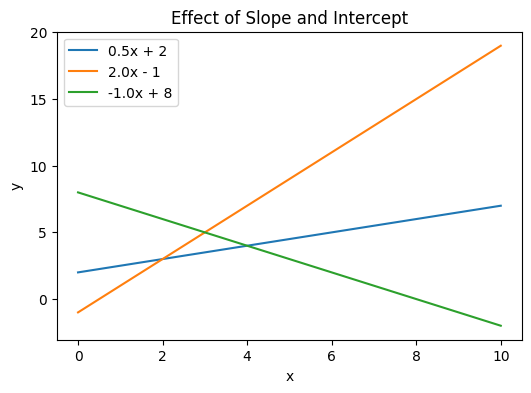

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define x-range
x = np.linspace(0, 10, 100)

# Three lines with varied parameters
y1 = 0.5 * x + 2     # Mild incline
y2 = 2.0 * x - 1     # Steeper incline
y3 = -1.0 * x + 8    # Negative incline

plt.figure(figsize=(6,4))
plt.plot(x, y1, label='0.5x + 2')
plt.plot(x, y2, label='2.0x - 1')
plt.plot(x, y3, label='-1.0x + 8')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Effect of Slope and Intercept')
plt.show()



**Task:** Describe which line would be easiest to fit in the presence of noise and why. Change the paramenters and observe the result.

---

### Exercise 2: Noisy Linear Data

**Explanation:** Real-world data often includes noise. Generate a true linear relationship and add Gaussian noise to observe how noise level affects model fitting.

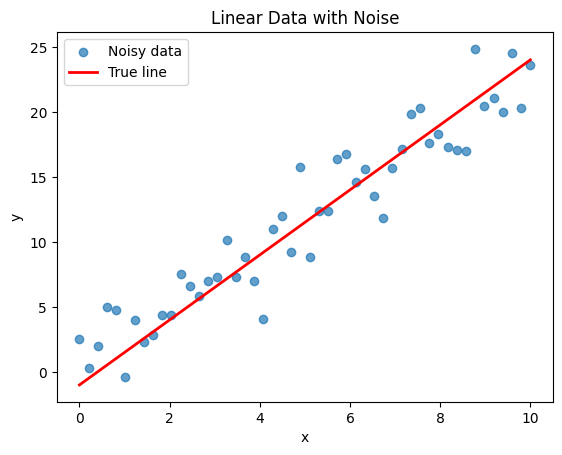

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
true_slope, true_intercept = 2.5, -1.0
x = np.linspace(0, 10, 50)

# Generate clean and noisy targets
y_clean = true_slope * x + true_intercept
noise = np.random.normal(loc=0, scale=2.0, size=x.shape) # Noise
y_noisy = y_clean + noise

plt.scatter(x, y_noisy, alpha=0.7, label='Noisy data')
plt.plot(x, y_clean, 'r-', lw=2, label='True line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Data with Noise')
plt.legend()
plt.show()



**Task:** Modify the `scale` of the noise distribution; note at which point the noise obscures the true trend.

---

### Exercise 3: Manual 3D Plane

**Explanation:** Extend linear models to two predictors. In this case, the model represents a plane in 3D. Plot the plane defined by $z = w_1x + w_2y + b$ to build intuition for multivariate regression.

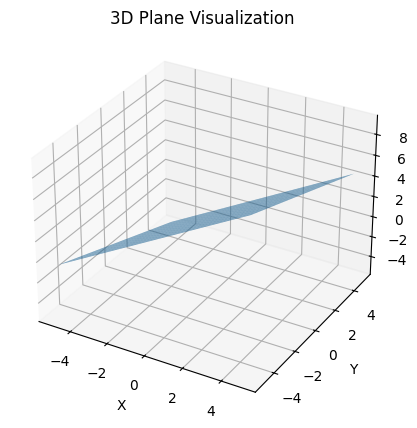

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

w1, w2, b = 1.0, -0.5, 2.0
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
Z = w1 * X + w2 * Y + b

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Plane Visualization')
plt.show()



**Task:** Change `w1`, `w2`, and `b` to see how the plane shifts and tilts.

---

## Section 2: Matrix Manipulation with NumPy & Pandas

### Exercise 4: NumPy Means

**Explanation:** Practice basic array operations by computing means manually, reinforcing understanding of vectorized operations versus explicit loops.

In [4]:
import numpy as np

data = np.random.randn(5, 3)  # 5 rows, 3 columns
row_means = np.mean(data, axis=1)
col_means = np.mean(data, axis=0)
print('Row means:', row_means)
print('Column means:', col_means)

# Verify by summing and dividing
row_means_manual = np.sum(data, axis=1) / data.shape[1]
col_means_manual = np.sum(data, axis=0) / data.shape[0]
print('Verified row means:', row_means_manual)
print('Verified col means:', col_means_manual)


Row means: [-0.33978973 -0.26016085 -0.08844432 -0.46491826 -0.78733425]
Column means: [-0.63709379 -0.34751018 -0.17978448]
Verified row means: [-0.33978973 -0.26016085 -0.08844432 -0.46491826 -0.78733425]
Verified col means: [-0.63709379 -0.34751018 -0.17978448]



**Task:** Without using `np.mean`, compute the means through sums (with a for loop) and division and compare.

---

### Exercise 5: Pandas DataFrame Basics

**Explanation:** Load tabular data and inspect its structure. Summary statistics help identify scale, range, and potential anomalies.

In [5]:
import pandas as pd
# Load data
# You can choose any dataset from kaggle to experiment
# df = pd.read_csv('data.csv')
# For demonstration, we generate a synthetic dataset with random features:
np.random.seed(1)
df = pd.DataFrame({
    'A': np.random.randn(100),
    'B': np.random.randn(100) * 2 + 5,
    'C': np.random.randint(0, 50, 100)
})

print(df.head())
print(df.describe())


          A         B   C
0  1.624345  4.105743  46
1 -0.611756  7.449015  40
2 -0.528172  5.806983  25
3 -1.072969  6.187157  39
4  0.865408  2.810176  48
                A           B           C
count  100.000000  100.000000  100.000000
mean     0.060583    5.305590   24.450000
std      0.889615    1.873380   13.731461
min     -2.301539    0.130324    0.000000
25%     -0.613818    4.399980   12.000000
50%      0.064074    5.473232   25.000000
75%      0.637410    6.486040   37.000000
max      2.185575   10.056651   49.000000



**Task:** Add a new column `D = 2*A - 0.5*B` and display the updated `df.head()`.

---

### Exercise 6: DataFrame ↔ NumPy Conversion

**Explanation:** Convert between Pandas and NumPy to leverage both libraries’ strengths. Perform matrix multiplication on DataFrame values.

In [6]:
import pandas as pd
import numpy as np
# Assume df from previous exercise
data = df[['A', 'B', 'C']].values

# Define transformation matrix
T = np.array([[1, 0, 2], [0, 1, -1], [1, 1, 1]])

# Apply transformation
result = data.dot(T)
new_df = pd.DataFrame(result, columns=['A2', 'B2', 'C2'])
print(new_df.head())


          A2         B2         C2
0  47.624345  50.105743  45.142948
1  39.388244  47.449015  31.327472
2  24.471828  30.806983  18.136673
3  37.927031  45.187157  30.666906
4  48.865408  50.810176  46.920639



**Task:** Explain the difference between row-wise and column-wise operations in Pandas vs NumPy.

---

## Section 3: Linear Regression with Synthetic Data

### Exercise 7: Informative vs. Noise Feature

**Explanation:** Create a dataset with one meaningful feature and one random noise feature to see how regression identifies signal.

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(1)
x1 = rng.randn(100)
x2 = rng.randn(100)
y = 3 * x1 + rng.randn(100) * 0.5 # x1 is the informative feature

X = np.column_stack((x1, x2))
model = LinearRegression().fit(X, y)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [2.96905138 0.10918568]
Intercept: -0.009897097814411698



**Task:** Identify which coefficient corresponds to the informative feature. Discuss why the noise feature’s coefficient is near zero.

---

### Exercise 8: Handling Missing Data

**Explanation:** Missing values are common. Use [imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) to fill gaps and evaluate impact on model performance.

In [8]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create missing values
X_missing = X.copy() # copy the previous data
mask = rng.rand(*X_missing.shape) < 0.1
X_missing[mask] = np.nan

# Impute
imputer = SimpleImputer(strategy='mean')
X_filled = imputer.fit_transform(X_missing)

# Compare performance
def fit_score(Xi):
    m = LinearRegression().fit(Xi, y)
    return r2_score(y, m.predict(Xi))

print('R² before imputation:', fit_score(np.nan_to_num(X_missing)))
print('R² after imputation:', fit_score(X_filled))


R² before imputation: 0.8042688971533689
R² after imputation: 0.805409141015455



**Task:** Experiment with different imputation strategies (`median`, `most_frequent`) and compare R².

---

### Exercise 9: Impact of Outliers

**Explanation:** Extreme values can skew regression. Introduce outliers and visualize their effect on fit.

R² without outliers: 0.9664412498283659
R² with outliers: 0.35434387968943015


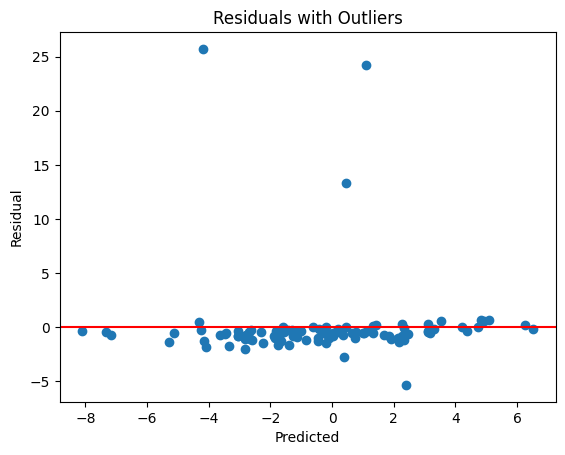

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

y_out = y.copy()
outlier_indices = rng.choice(len(y_out), size=5, replace=False)
y_out[outlier_indices] += rng.randn(5) * 20

model_std = LinearRegression().fit(X, y)
model_out = LinearRegression().fit(X, y_out)

print('R² without outliers:', model_std.score(X, y))
print('R² with outliers:', model_out.score(X, y_out))

# Residual plot
plt.scatter(model_out.predict(X), model_out.predict(X) - y_out)
plt.axhline(0, color='r')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residuals with Outliers')
plt.show()



**Task:** Describe how outliers affect coefficient estimates and residual distribution.

---

### Exercise 10: Train/Test Split

**Explanation:** Evaluate generalization by comparing training vs. test performance.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LinearRegression().fit(X_train, y_train)
print('Train R²:', model.score(X_train, y_train))
print('Test R²:', model.score(X_test, y_test))


Train R²: 0.971212331466113
Test R²: 0.9471317080798465



**Task:** Based on R² scores, assess if the model overfits or underfits.

---

### Exercise 11: Normal Equation

**Explanation:** (advanced) Use closed-form solution for linear regression model $\mathbf{y} = \mathbf{X}\boldsymbol\beta$ using matrix algebra:

$
\hat{\boldsymbol\beta}
= \bigl(\mathbf{X}^\top \mathbf{X}\bigr)^{-1}\,\mathbf{X}^\top\,\mathbf{y}.
$

$\hat{\boldsymbol\beta}$ is the estimate of our parameters.

In [11]:
import numpy as np
# Add bias term
X_b = np.hstack([np.ones((X.shape[0], 1)), X])
# Compute theta
beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print('Manual parameters:', beta)


Manual parameters: [-0.0098971   2.96905138  0.10918568]



**Task:** Compare manual `theta` to `sklearn` coefficients (including intercept).

---

### Exercise 12: 3D Regression Plane

**Explanation:** Visualize fitted plane for two features to inspect model fit in 3D.

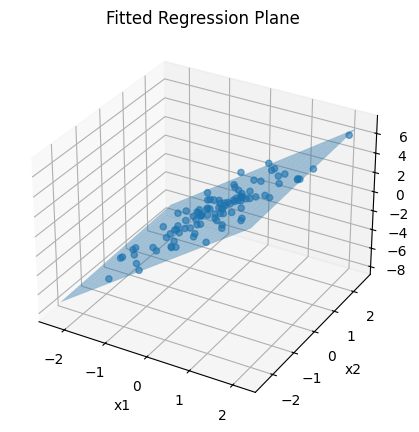

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)
w, b0 = model.coef_, model.intercept_

# Create grid
grid_x, grid_y = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 20),
                             np.linspace(X[:,1].min(), X[:,1].max(), 20))
grid_z = w[0]*grid_x + w[1]*grid_y + b0

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, alpha=0.6)
ax.plot_surface(grid_x, grid_y, grid_z, alpha=0.4)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('Fitted Regression Plane')
plt.show()



**Task:** Rotate the plot interactively to inspect fit quality.

---

## Section 4: Gradient Descent

### Exercise 13: Batch Gradient Descent

**Explanation:** Implement gradient descent to minimize MSE for univariate regression, and observe parameter convergence.

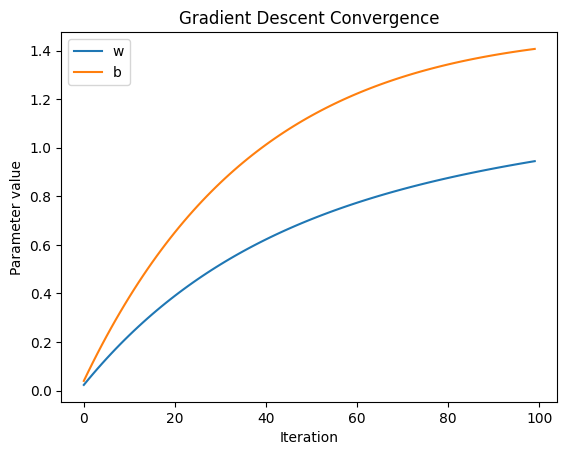

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
t = rng
x =  rng.rand(100) #? - Create some random feature with the right dimensions
y = 2 * x + 1 + rng.randn(100) * 0.5
# Initialize parameters
w, b = 0.0, 0.0
lr = 0.01 # Learning rate
iters = 100
w_list, b_list = [], []

for i in range(iters):
    y_pred = w * x + b
    # Compute derivative
    dw = (-2/len(x)) * np.dot(x, (y - y_pred))
    db = (-2/len(x)) * np.sum(y - y_pred)
    # Perform gradient descent
    w -= lr * dw
    b -= lr * db
    # Keep track of the evolution
    w_list.append(w)
    b_list.append(b)

# Add a plot of the true values as a horizontal line
plt.plot(w_list, label='w')
plt.plot(b_list, label='b')
plt.xlabel('Iteration')
plt.ylabel('Parameter value')
plt.legend()
plt.title('Gradient Descent Convergence')
plt.show()



**Task:** Experiment with different learning rates and iteration counts.

---

### Exercise 14: Cost Surface & Path

**Explanation:** Visualize MSE cost surface over a grid of `(w,b)` and overlay gradient descent trajectory.

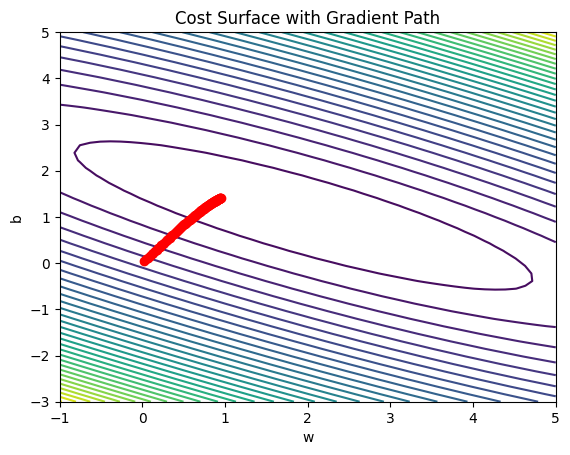

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Compute cost surface
grid_w = np.linspace(-1, 5, 50)
grid_b = np.linspace(-3, 5, 50)
W, B = np.meshgrid(grid_w, grid_b)
J = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        y_pred = W[i,j]*x + B[i,j]
        J[i,j] = np.mean((y - y_pred)**2)

# Contour plot
plt.contour(W, B, J, levels=30)
# Overlay path from previous exercise
plt.plot(w_list, b_list, 'ro-')
plt.xlabel('w')
plt.ylabel('b')
plt.title('Cost Surface with Gradient Path')
plt.show()



**Task:** Try different starting points or learning rates and compare paths.

---

### Exercise 15: Stochastic & Mini-Batch GD

**Explanation:** (Advanced) Compare full-batch, stochastic (single sample), and mini-batch gradient descent, visualizing convergence speed.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sgd(X, y, lr, iters):
    w, b = 0, 0
    costs = []
    for epoch in range(iters):
        for xi, yi in zip(X, y):
            dw = -2 * xi * (yi - (w*xi + b))
            db = -2 * (yi - (w*xi + b))
            w -= lr * dw
            b -= lr * db
        costs.append(np.mean((y - (w*X + b))**2))
    return costs

cost_sgd = sgd(x, y, 0.01, 50)
cost_batch = []  # reuse J from batch exercise or recompute

plt.plot(cost_sgd, label='SGD')
# plt.plot(cost_batch, label='Batch GD')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('SGD vs Batch GD')
plt.show()



**Task:** Implement mini-batch version and add to the comparison plot.

---

## Section 5: Non-Linear Regression, Overfitting & Underfitting

### Exercise 16: Polynomial Regression

**Explanation:** Fit polynomial models of varying degree to quadratic data to observe model flexibility.

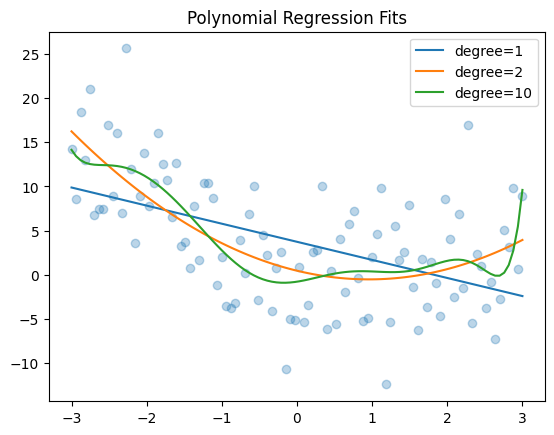

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data
t = rng
x_poly = np.linspace(-3, 3, 100).reshape(-1,1)
y_poly = 1 - 2*x_poly + x_poly**2 + rng.randn(100,1)*5

degrees = [1, 2, 10]
for d in degrees:
    poly = PolynomialFeatures(d)
    Xd = poly.fit_transform(x_poly)
    model = LinearRegression().fit(Xd, y_poly)
    y_pred = model.predict(Xd)
    plt.plot(x_poly, y_pred, label=f'degree={d}')

plt.scatter(x_poly, y_poly, alpha=0.3)
plt.legend()
plt.title('Polynomial Regression Fits')
plt.show()



**Task:** Compute and compare R² for each degree.

---

### Exercise 17: Underfitting vs Overfitting

**Explanation:** Fit a constant model and a high-degree polynomial to highlight under- and overfitting.

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Xtr, Xte, ytr, yte = train_test_split(x_poly, y_poly, test_size=0.3, random_state=0)

# Underfit: constant
dummy = DummyRegressor(strategy='mean').fit(Xtr, ytr)
# Overfit: degree 15
poly15 = PolynomialFeatures(15)
X15 = poly15.fit_transform(Xtr)
model15 = LinearRegression().fit(X15, ytr)

# Evaluate
print('Dummy train MSE:', mean_squared_error(ytr, dummy.predict(Xtr)))
print('Dummy test MSE:', mean_squared_error(yte, dummy.predict(Xte)))
print('Poly15 train MSE:', mean_squared_error(ytr, model15.predict(X15)))
X15_te = poly15.transform(Xte)
print('Poly15 test MSE:', mean_squared_error(yte, model15.predict(X15_te)))


Dummy train MSE: 54.18844649483118
Dummy test MSE: 44.03186226207591
Poly15 train MSE: 27.118449152009394
Poly15 test MSE: 53.61367092943127



**Task:** Discuss how complexity affects train vs test error.

---

### Exercise 18: Cross-Validation for Degree Selection

**Explanation:** Use CV to choose polynomial degree that balances bias and variance.

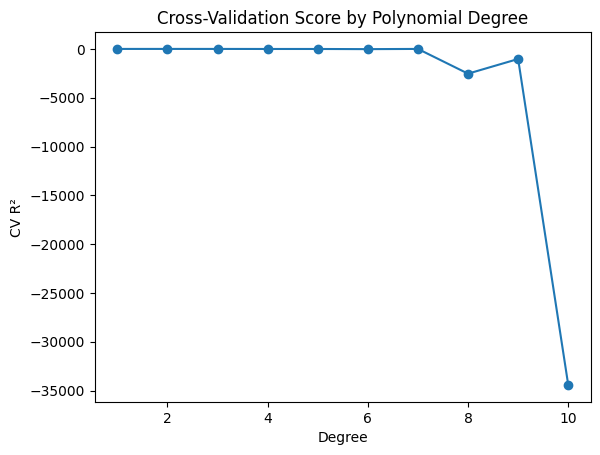

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

degrees = range(1, 11)
scores = []
for d in degrees:
    pipeline = make_pipeline(PolynomialFeatures(d), LinearRegression())
    cv_score = np.mean(cross_val_score(pipeline, x_poly, y_poly, cv=5, scoring='r2'))
    scores.append(cv_score)

plt.plot(degrees, scores, marker='o')
plt.xlabel('Degree')
plt.ylabel('CV R²')
plt.title('Cross-Validation Score by Polynomial Degree')
plt.show()



**Task:** Identify the optimal degree and explain why.

---

### Exercise 19: Bias-Variance Tradeoff Simulation

**Explanation:** In this exercise, you will empirically observe the tradeoff between bias (error due to overly simple models) and variance (error due to overly complex models) as both model complexity and data noise change:

*   Bias: Simpler models (lower-degree polynomials) may have high bias, systematically underfitting the true quadratic relationship and yielding large error even on training data.
*   Variance: Complex models (higher-degree polynomials) are flexible and can fit noise in the training set, leading to low training error but high variance—tiny changes in the data (e.g., increased noise) will drastically change the fitted curve.

By looping over different noise levels and polynomial degrees, you will see how the optimal complexity (the degree that minimizes training MSE) shifts.

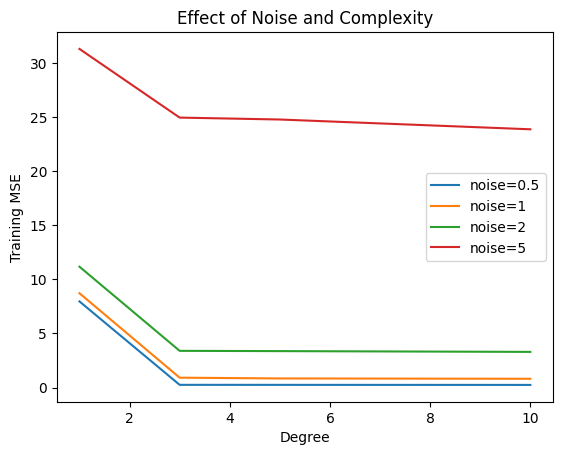

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

noise_levels = [0.5, 1, 2, 5]
degrees = [1, 3, 5, 10]
results = {}
for noise in noise_levels:
    xs = x_poly
    ys = 1 - 2*xs + xs**2 + rng.randn(100,1)*noise
    results[noise] = []
    for d in degrees:
        poly = PolynomialFeatures(d)
        Xd = poly.fit_transform(xs)
        model = LinearRegression().fit(Xd, ys)
        results[noise].append(mean_squared_error(ys, model.predict(Xd)))

for noise, errs in results.items():
    plt.plot(degrees, errs, label=f'noise={noise}')
plt.xlabel('Degree')
plt.ylabel('Training MSE')
plt.legend()
plt.title('Effect of Noise and Complexity')
plt.show()



**Task:** Explain how noise level influences optimal complexity (degree or number of parameters).

---

### Exercise 20: Decision Tree vs Polynomial

**Explanation:** Compare flexible non-parametric model to parametric polynomials. We will study decision trees on Week 4.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Fit models
poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression()).fit(x_poly, y_poly)
tree = DecisionTreeRegressor(max_depth=5).fit(x_poly, y_poly)

# Predictions
grid = np.linspace(-3,3,200).reshape(-1,1)
p2 = poly2.predict(PolynomialFeatures(2).fit_transform(grid))
tp = tree.predict(grid)

plt.scatter(x_poly, y_poly, alpha=0.2)
plt.plot(grid, p2, label='Poly deg2')
plt.plot(grid, tp, label='Decision Tree')
plt.legend()
plt.title('Polynomial vs Tree Regression')
plt.show()


ValueError: X has 3 features, but PolynomialFeatures is expecting 1 features as input.


**Task:** Discuss model flexibility and overfitting tendencies.

---

## Section 6: Generalization & Curse of Dimensionality

### Exercise 21: Volume of High-Dimensional Shells

**Explanation:**
In low dimensions (e.g., a 2D circle or 3D sphere), a significant portion of the volume lies closer to the center. However, as dimensionality increases, almost all of the volume of a unit ball concentrates in a thin outer shell. This counterintuitive phenomenon underpins many challenges in high-dimensional learning:

- Sparsity of Data: Points sampled uniformly become increasingly far apart, making local neighborhoods less meaningful.

- Distance Concentration: Distances between points tend to converge, degrading the effectiveness of distance-based algorithms.

- Sampling Difficulty: To cover a high-dimensional space adequately requires exponentially more samples.

By empirically measuring the fraction of points that fall within the outer 1% of the radius for increasing dimensions, you will see how quickly the boundary dominates the volume. This illustrates why high-dimensional regression and clustering often require dimensionality reduction or strong regularization.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dims = [1,2,3,5,10,20]
fractions = []
for d in dims:
    pts = rng.randn(100000, d)
    pts /= np.linalg.norm(pts, axis=1)[:,None]
    r = rng.rand(100000)**(1/d) # Lots of points
    dist = r  # radial distance
    shell = np.logical_and(dist >= 0.99, dist <= 1)
    fractions.append(shell.mean())

plt.plot(dims, fractions, marker='o')
plt.xlabel('Dimension')
plt.ylabel('Fraction in Outer 1% Shell')
plt.title('Curse of Dimensionality')
plt.show()



**Task:** Interpret why learning in high dimensions is challenging.

---

### Exercise 22: Feature Correlation Heatmap

**Explanation:** Visualize redundancy in high-dimensional Gaussian data.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate data
X_hd = rng.randn(1000, 10)

# Correlation matrix
corr = np.corrcoef(X_hd, rowvar=False)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()



**Task:** Identify any strongly correlated feature pairs and discuss implications.

---

### Exercise 23: Nearest Neighbor Distance Ratio

**Explanation:** (Advanced) Compare distance concentration in original vs random-projection spaces.

In [ ]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection

# Original distances
pt = rng.randn(1000,50)
dists = np.linalg.norm(pt - pt[0], axis=1)

# Project to 2D
proj = GaussianRandomProjection(n_components=2).fit_transform(pt)
dists2 = np.linalg.norm(proj - proj[0], axis=1)

print('Avg dist in 50D:', dists.mean())
print('Avg dist in 2D:', dists2.mean())



**Task:** Discuss how dimensionality affects distance-based methods.

---

## Section 7: Regularization

### Exercise 24: Ridge vs Lasso Coefficient Paths

**Explanation:** Observe how regularization shrinks coefficients as penalty increases. First, we will generate a synthetic dataset with multiple features and a noisy target, then fit Ridge and Lasso across a range of penalty strengths.

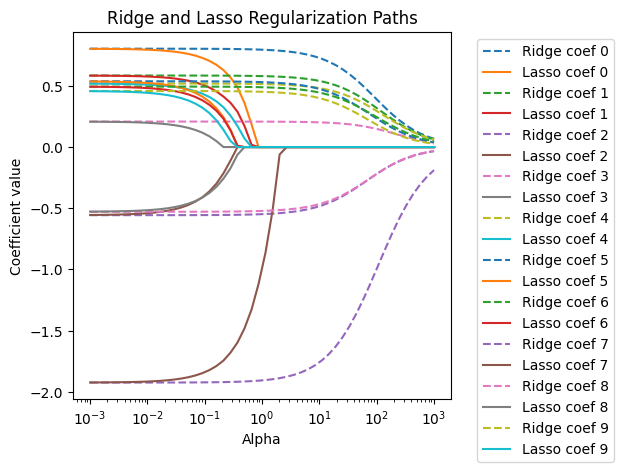

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

# Generate synthetic data
rng = np.random.RandomState(0)
X = rng.randn(100, 10)                # 100 samples, 10 features
true_coef = rng.randn(10)             # underlying coefficients
y = X.dot(true_coef) + rng.randn(100) * 5  # add noise to targets

# Regularization paths
alphas = np.logspace(-3, 3, 50) # Fitting the model for different values of alpha
coefs_ridge = []
coefs_lasso = []
for a in alphas:
    coefs_ridge.append(Ridge(alpha=a).fit(X, y).coef_)
    coefs_lasso.append(Lasso(alpha=a, max_iter=10000).fit(X, y).coef_)

coefs_ridge = np.array(coefs_ridge)
coefs_lasso = np.array(coefs_lasso)

# Plot paths for each feature
for i in range(X.shape[1]):
    plt.plot(alphas, coefs_ridge[:, i], '--', label=f'Ridge coef {i}')
    plt.plot(alphas, coefs_lasso[:, i], '-', label=f'Lasso coef {i}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient value')
plt.title('Ridge and Lasso Regularization Paths')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



**Task:** Explain differences in how Ridge and Lasso treat coefficients.

---

### Exercise 25: CV for Regularization Parameter

**Explanation:** Tune penalty strength via grid search and cross-validation. Read the documentation on the unknown functions. We will see more about this in the future.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {'alpha': np.logspace(-3,3,20)}
gs = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
gs.fit(X, y)
print('Best alpha:', gs.best_params_['alpha'])
print('Best CV R²:', gs.best_score_)



**Task:** Plot CV scores vs alpha to visualize the tuning curve.

---

### Exercise 26: ElasticNet Comparison

**Explanation:** (Advanced) Combine L1 and L2 penalties to handle correlated features. Read about ElasticNet.

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.logspace(-3,3,10), 'l1_ratio': [0.1,0.5,0.9]}
gs_en = GridSearchCV(ElasticNet(max_iter=10000), param_grid, cv=5)
gs_en.fit(X, y)
print('Best params:', gs_en.best_params_)
print('Best CV R²:', gs_en.best_score_)



**Task:** Discuss scenarios where ElasticNet outperforms Ridge or Lasso alone.

---

## Section 8: Loss Functions for Regression

### Exercise 27: MSE vs MAE Loss Curves

**Explanation:** Plot MSE and MAE as functions of prediction error to understand sensitivity.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

e = np.linspace(-5,5,400)
mse = e**2
mae = np.abs(e)

plt.plot(e, mse, label='MSE')
plt.plot(e, mae, label='MAE')
plt.xlabel('Error')
plt.ylabel('Loss')
plt.title('Loss Functions')
plt.legend()
plt.show()



**Task:** Identify ranges where MAE and MSE differ most and explain why.

---

### Exercise 28: Huber Loss Implementation

**Explanation:** Huber loss combines MSE and MAE to be robust to outliers.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def huber(e, delta=1.0):
    return np.where(np.abs(e) <= delta, 0.5*e**2, delta*(np.abs(e) - 0.5*delta))

e = np.linspace(-5,5,400)

plt.plot(e, e**2, '--', label='MSE')
plt.plot(e, np.abs(e), ':', label='MAE')
plt.plot(e, huber(e), '-', label='Huber')
plt.xlabel('Error')
plt.ylabel('Loss')
plt.title('Comparison of Loss Functions')
plt.legend()
plt.show()



**Task:** Explain how Huber loss mitigates outlier influence compared to MSE.

---

## Section 9: Error Analysis & Visualization

### Exercise 29: Residuals vs Predictions

**Explanation:** Residual plots help detect non-linearity, [heteroscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity), and bias.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
rng = np.random.RandomState(42) # Fix the seed for reproducibility
X = rng.uniform(-5, 5, size=(200, 1))
y = 2.0 * X.flatten() + 1.0 + rng.randn(200) * 2.5  # true line with noise

# Fit linear model
model = LinearRegression().fit(X, y)
preds = model.predict(X)
residuals = preds - y

# Plot residuals
plt.figure(figsize=(6,4))
plt.scatter(preds, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


**Task:** Look for patterns indicating model inadequacy (e.g., funnel shapes).

---

### Exercise 30: Learning Curves

**Explanation:** Use learning curves to determine if more data or a different model complexity would help.

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(), X, y, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1,1.0,10))

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Train')
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', label='Validation')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curves')
plt.legend()
plt.show()



**Task:** Determine whether gathering more data or increasing model complexity is likely to improve performance.
